<a href="https://colab.research.google.com/github/ShubhamP1028/DeepLearningTute/blob/main/Pytorch_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

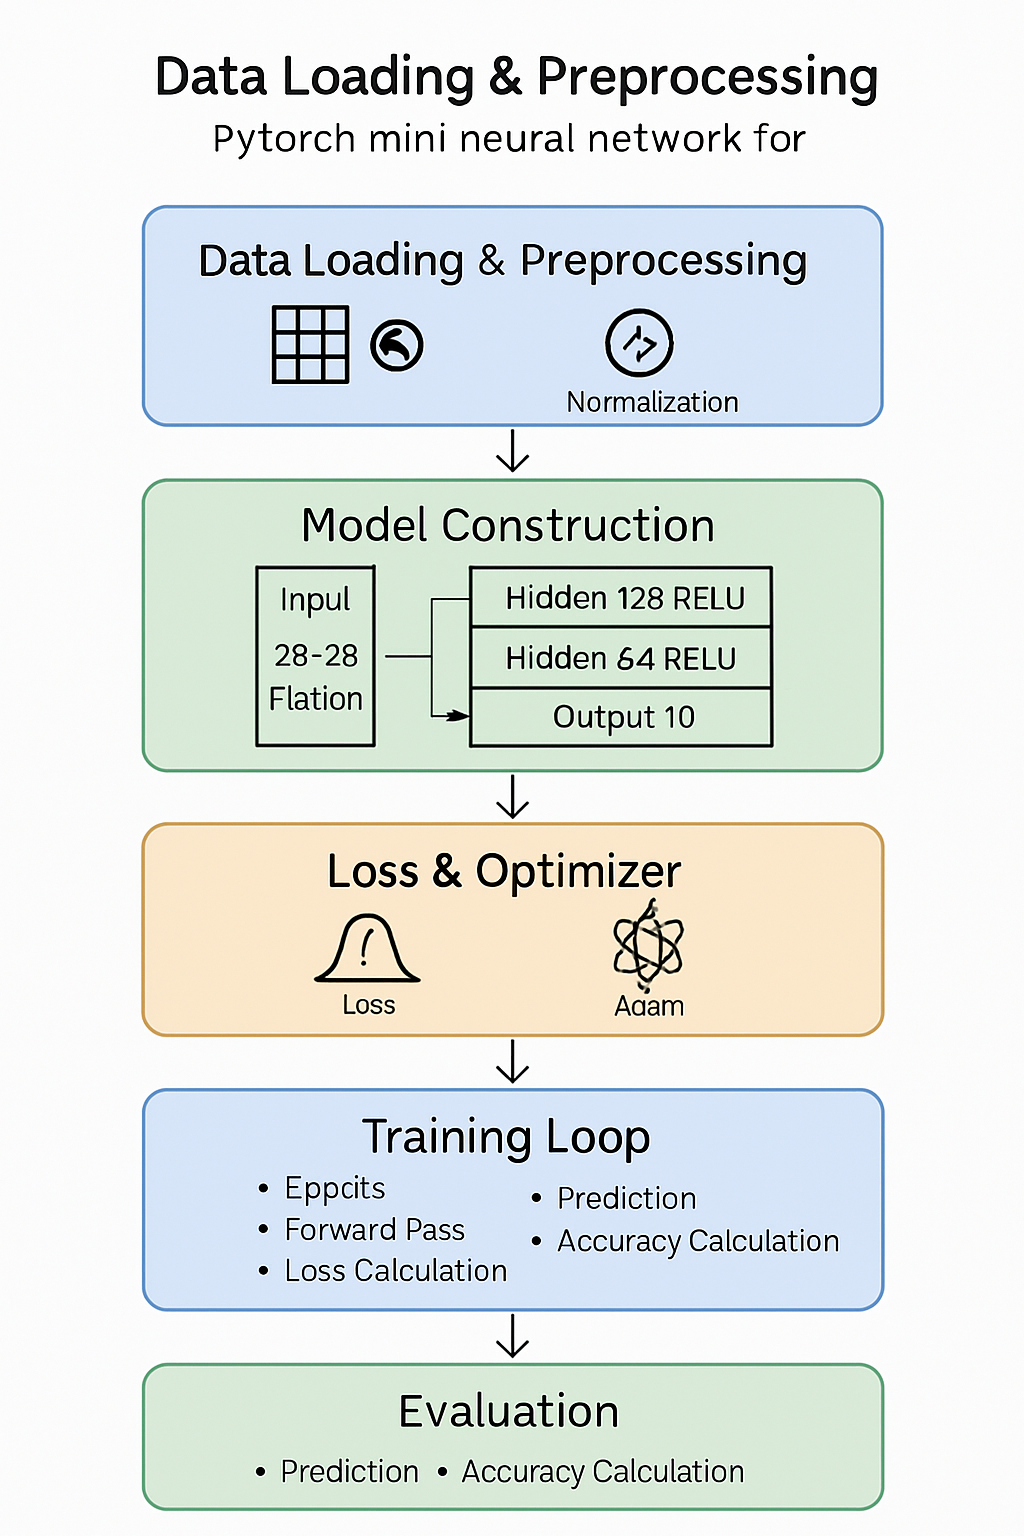
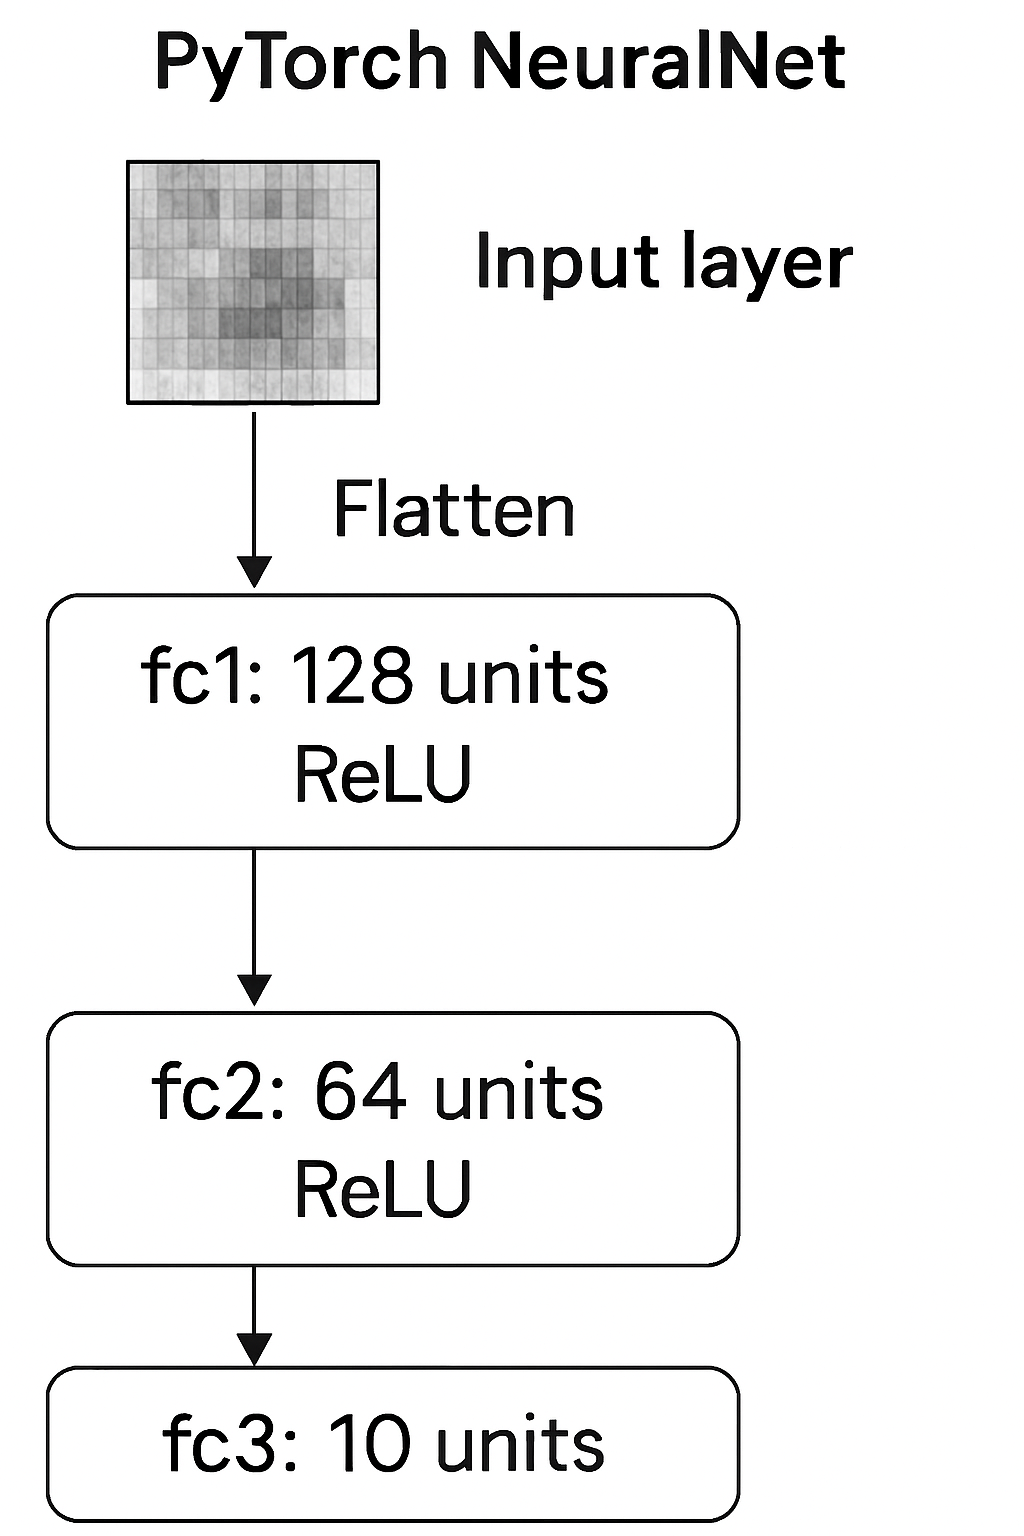

In [ ]:
# !pip install pytorch

torch: The main PyTorch library, our entire kitchen.

torch.nn: Contains the building blocks for creating neural networks (like layers), which we'll call nn.

torch.optim: Contains optimization algorithms (like Adam) that help our model learn.

torchvision: A library that provides popular datasets, model architectures, and image transformations.

DataLoader: A handy tool that helps us feed data to our model in an efficient way.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

*  transform ->> This is a "recipe" of preparation steps for our images.

*  transforms.ToTensor() ->> Converts the images from a picture format into a grid of numbers (a tensor).

*  transforms.Normalize((0.5,), (0.5,)) ->> Adjusts the range of the pixel values to be centered around zero. This helps the network learn more easily and stablely.

*  datasets.MNIST ->> This line downloads the famous MNIST dataset of 60,000 training images and 10,000 testing images of handwritten digits (0-9).

*  DataLoader ->> This is like an efficient conveyor belt. Instead of feeding all 60,000 images to our model at once (which would overwhelm it), the DataLoader serves up the data in small, manageable batches (32 images at a time). shuffle=True for the training set means it shuffles the images like a deck of cards before each training round, which helps the model learn better.

In [ ]:
# 1. Data loading & preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.82MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.11MB/s]


*  class NeuralNet(nn.Module) ->> We define our model as a "class" or a blueprint. It inherits all the basic functionality from PyTorch's nn.Module.

*  <p>__init__(self) ->> This is the "constructor" where we define all the building blocks (the layers) we'll need.</p>

*  nn.Linear(input_size, output_size) ->> This creates a "fully connected" or "dense" layer of neurons. For example, self.fc1 connects the 784 pixels of our flattened image to 128 neurons.

*  forward(self, x) ->> This defines the path that data will take as it flows forward through the network.

*  x.view(-1, 28*28) ->> First, we flatten the 28x28 image into a single, long line of 784 pixels.

*  torch.relu(...) ->> We pass the data through our first two layers and apply a ReLU activation function. This acts like a switch that helps the network learn com plex patterns.

*  self.fc3(x) ->> The data goes through the final layer. We don't apply a softmax activation here because the loss function we use next will do it for us automatically.

*  model = NeuralNet() ->> Finally, we create an actual instance of our model from the blueprint.

In [ ]:
# 2. Build model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # no softmax here
        return x

model = NeuralNet()

![image.png]()

*  criterion (Loss Function) ->> CrossEntropyLoss is the standard choice for multi-class classification problems like this one.

*  optimizer ->> Adam optimizer intelligently adjusts all the model's internal weights to improve its predictions.
*  lr=0.001 is the learning rate, which controls how big those adjustments are.

In [ ]:
# 3. Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

For each batch of images and labels from our train_loader, we perform four crucial steps:

*  optimizer.zero_grad() ->> We reset the calculations from the previous batch. It's like clearing the slate before solving the next problem.

*  outputs = model(images) ->> We feed the images to the model to get its predictions.

*  loss = criterion(outputs, labels) ->> We use the loss function to calculate how wrong the predictions were.

*  loss.backward() ->> This is the magic step. PyTorch automatically calculates how each weight in the model contributed to the error (this is called calculating gradients).

*  optimizer.step() ->> The optimizer uses the information from backward() to update all the model's weights, nudging them in the right direction to reduce the error next time.

In [ ]:
# 4. Training loop
for epoch in range(5):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/5], Loss: {loss.item():.4f}")


Epoch [1/5], Loss: 0.1733
Epoch [2/5], Loss: 0.0771
Epoch [3/5], Loss: 0.0874
Epoch [4/5], Loss: 0.1270
Epoch [5/5], Loss: 0.0089


In [ ]:
# 5. Evaluation
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 96.82%
